In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import zipfile


os.chdir("../soheil")

zf = zipfile.ZipFile('order_products__train.csv.zip') 
order_products__train = pd.read_csv(zf.open('order_products__train.csv'))

zf = zipfile.ZipFile('order_products__prior.csv.zip') 
order_products__prior = pd.read_csv(zf.open('order_products__prior.csv'))

zf = zipfile.ZipFile('sample_submission.csv.zip') 
sample_submission = pd.read_csv(zf.open('sample_submission.csv'))

zf = zipfile.ZipFile('aisles.csv.zip') 
aisles = pd.read_csv(zf.open('aisles.csv'))

zf = zipfile.ZipFile('orders.csv.zip') 
orders = pd.read_csv(zf.open('orders.csv'))

zf = zipfile.ZipFile('products.csv.zip') 
products = pd.read_csv(zf.open('products.csv'))

zf = zipfile.ZipFile('departments.csv.zip') 
departments = pd.read_csv(zf.open('departments.csv'))


In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [4]:
order_products__train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(4)
memory usage: 42.3 MB


In [5]:
#Checking memory usage
order_products__prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


In [6]:
order_products__prior.describe()

,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


In [7]:
#Reducing memory usage

order_products__prior = order_products__prior.astype('Int32')
order_products__prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             Int32
product_id           Int32
add_to_cart_order    Int32
reordered            Int32
dtypes: Int32(4)
memory usage: 618.6 MB


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [10]:
pd.options.display.max_rows = 999
orders.loc[orders['eval_set']=='train'].sort_values(by='order_id').head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
1322255,36,79431,train,23,6,18,30.0
709772,38,42756,train,6,6,16,24.0
284948,96,17227,train,7,6,20,30.0
941403,98,56463,train,41,3,8,14.0


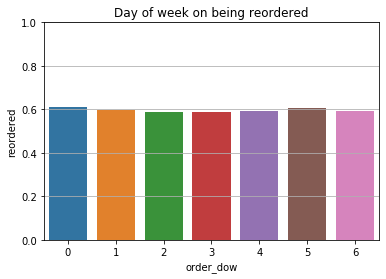

In [11]:
order_products__train_dow = order_products__train.merge(orders, on='order_id')
plt.grid(b=True)

plt.title('Day of week on being reordered')
C= order_products__train_dow[['reordered','order_dow']].groupby('order_dow').mean()
sns.barplot(x=C.index[0:70], y=C['reordered'])
plt.ylim(0,1)
plt.show()

In [12]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [13]:
orders.eval_set.unique()

array(['prior', 'train', 'test'], dtype=object)

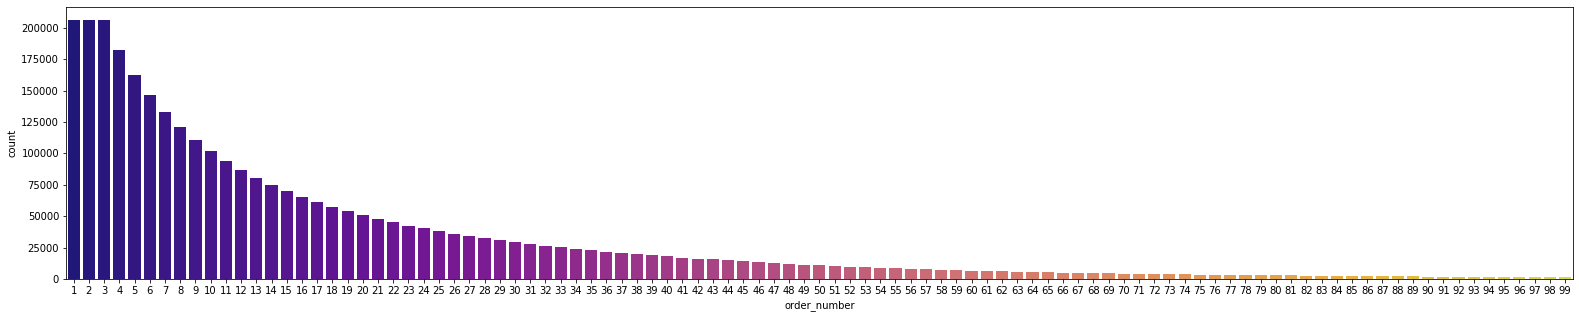

In [14]:
#How many prior orders are available based on order_numer?
plt.figure(figsize=(27,5))
sns.countplot(x='order_number', data = orders.loc[orders.eval_set=='prior'], palette='plasma')
plt.show()

In [15]:
np.sum(pd.isnull(orders))

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [16]:
orders.fillna(0, inplace=True)

In [17]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [18]:
orders.user_id.nunique()

206209

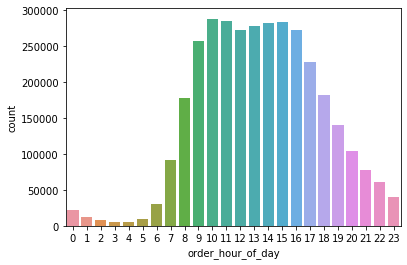

In [19]:
# Effect of hour of day on order volume
import matplotlib.pyplot as plt 
sns.countplot(x='order_hour_of_day', data =orders)
plt.show()

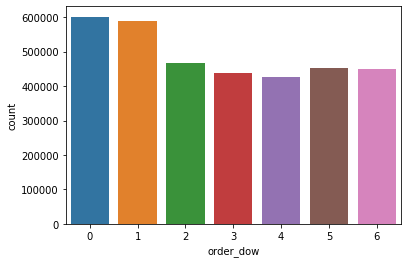

In [20]:
# Effect of day of the w on order volume
sns.countplot(x='order_dow', data =orders)
plt.show()

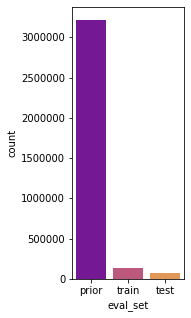

In [21]:
plt.figure(figsize=(2,5))
sns.countplot(orders['eval_set'], palette='plasma')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [22]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [23]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [24]:
order_products__train_merged = order_products__train.merge(products, on='product_id')

In [25]:
order_products__train_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16


In [26]:
#List of best selling products
best_seller_products = order_products__train_merged.product_name.value_counts()[0:10]
best_seller_products

Banana                    18726
Bag of Organic Bananas    15480
Organic Strawberries      10894
Organic Baby Spinach       9784
Large Lemon                8135
Organic Avocado            7409
Organic Hass Avocado       7293
Strawberries               6494
Limes                      6033
Organic Raspberries        5546
Name: product_name, dtype: int64

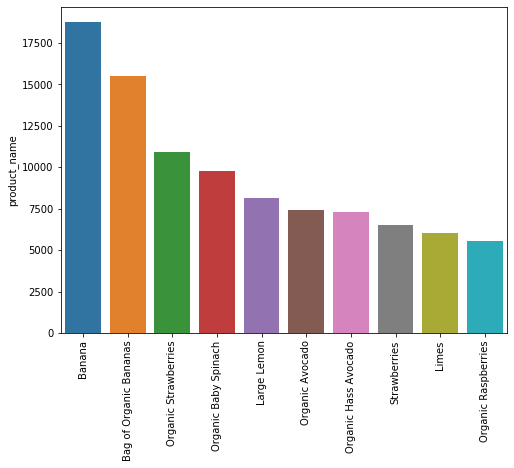

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(x= best_seller_products.index, y=best_seller_products )
plt.xticks(rotation=90)
plt.show()

In [28]:
order_products__train.reordered.value_counts()

1    828824
0    555793
Name: reordered, dtype: int64

In [29]:
order_products__train.reordered.value_counts(normalize=True)

1    0.598594
0    0.401406
Name: reordered, dtype: float64

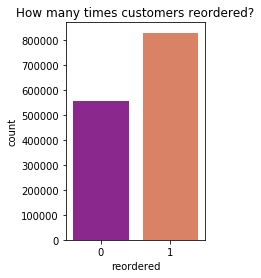

In [30]:
# How many times customers reordered?
plt.figure(figsize=(2.5,4))
plt.title('How many times customers reordered?')
sns.countplot(x='reordered', data= order_products__train, palette='plasma')
plt.show()

In [31]:
pd.options.display.max_rows = 999
order_products__train_merged.sample(5)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
1081434,1655904,31778,3,1,Oven Baked Cheddar & Sour Cream Potato Crisps,107,19
1043205,1388464,14168,11,1,Penne Pasta,131,9
376365,381098,39097,3,1,Gluten Free White Sandwich Bread,112,3
990740,1992905,31268,15,0,Sandwich Bags,85,17
855322,2973264,40939,1,1,Drinking Water,115,7


In [32]:
# Organic vs Not-organic products
order_products__train_merged['Organic or Not'] = order_products__train_merged.product_name.str.lower().str.contains('organic')
order_products__train_merged['Organic or Not'].replace({True:'Organic', False:'Not-Organic'}, inplace=True)

In [33]:
order_products__train_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,Organic or Not
0,1,49302,1,1,Bulgarian Yogurt,120,16,Not-Organic
1,816049,49302,7,1,Bulgarian Yogurt,120,16,Not-Organic
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,Not-Organic
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,Not-Organic
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,Not-Organic


In [34]:
order_products__train_merged['Organic or Not'].value_counts()

Not-Organic    979000
Organic        405617
Name: Organic or Not, dtype: int64

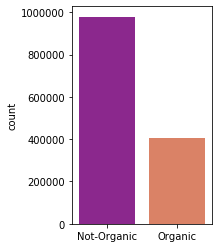

In [35]:
plt.figure(figsize=(2.5,4))
sns.countplot(order_products__train_merged['Organic or Not'], palette='plasma')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('')
plt.show()

In [36]:
orders.head(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


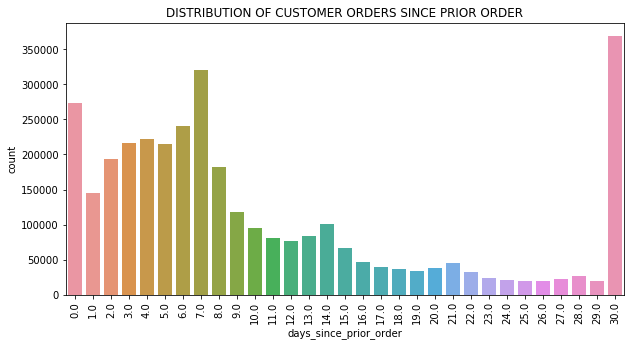

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(orders['days_since_prior_order'])

plt.title('distribution of customer orders since prior order'.upper())
plt.xticks(rotation=90)

plt.show()

In [38]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [39]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [40]:
product_aisle = products.merge(aisles, on='aisle_id')
product_aisle.head()

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes
2,102,Danish Butter Cookies,61,19,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes


In [41]:
order_products__prior_aisle = order_products__prior.merge(product_aisle, on='product_id')
order_products__prior_aisle.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,eggs


In [42]:
A = order_products__prior_aisle[['aisle_id','aisle']].groupby(by='aisle').count().sort_values(by='aisle_id', ascending=False)


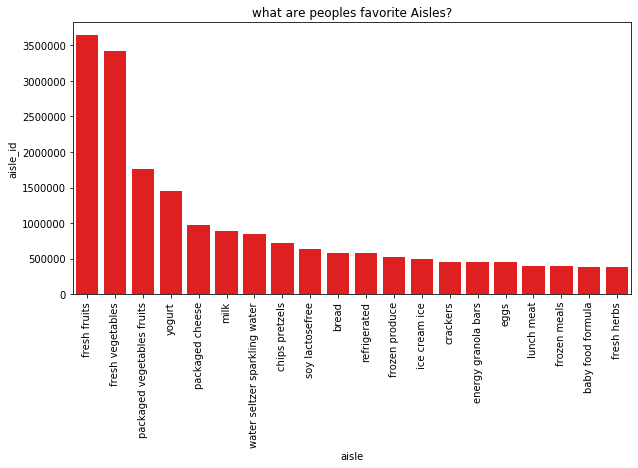

In [43]:
plt.figure(figsize=(10,5))
plt.title('what are peoples favorite Aisles?')

sns.barplot(x=A.index[0:20], y=A['aisle_id'][0:20], color='red')
plt.ticklabel_format(style='plain', axis='y')

plt.xticks(rotation=90)

plt.show()

In [44]:
order_products__prior_aisle.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,eggs


In [45]:
order_products__prior_aisle_dep = order_products__prior_aisle.merge(departments, on='department_id')
order_products__prior_aisle_dep.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,eggs,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,eggs,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,eggs,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,eggs,dairy eggs


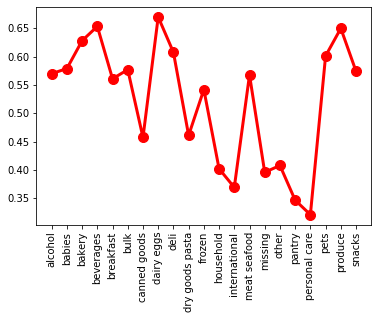

In [46]:
B= order_products__prior_aisle_dep[['reordered','department']].groupby('department').mean()
plt.plot(B.index, B['reordered'], 'r-o', linewidth=3, markersize=10)
plt.xticks(rotation=90)
plt.show()

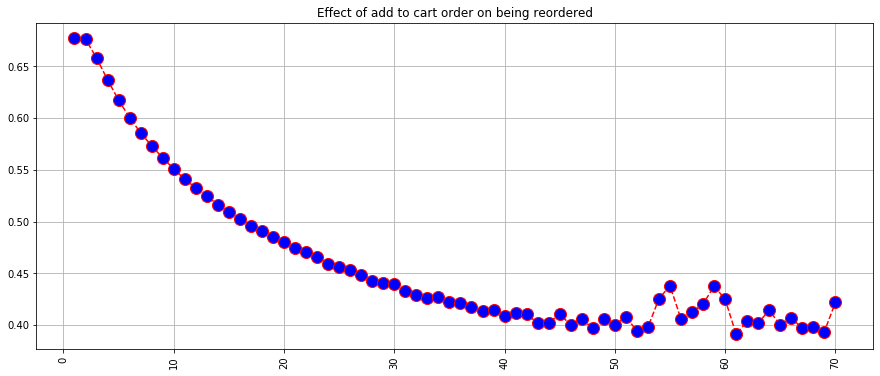

In [47]:
plt.figure(figsize=(15,6))
plt.grid(b=True)
plt.title('Effect of add to cart order on being reordered')
C= order_products__prior_aisle_dep[['reordered','add_to_cart_order']].groupby('add_to_cart_order').mean()
plt.plot(C.index[0:70], C['reordered'][0:70], color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=12)
plt.xticks(rotation=90)
plt.show()

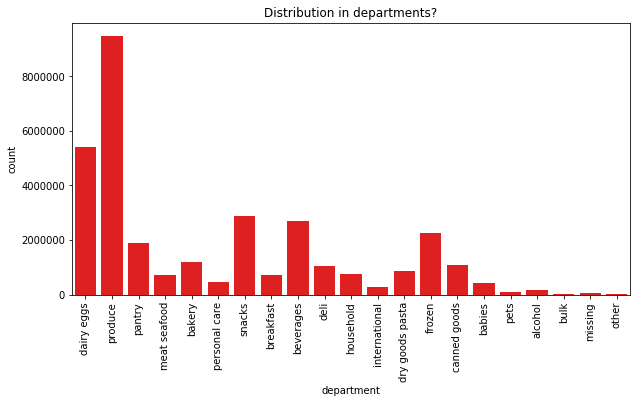

In [48]:
plt.figure(figsize=(10,5))
plt.title('Distribution in departments?')

sns.countplot(x=order_products__prior_aisle_dep['department'], color='red')
plt.ticklabel_format(style='plain', axis='y')

plt.xticks(rotation=90)

plt.show()

In [49]:
order_products__prior_aisle_dep['department'].value_counts()

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

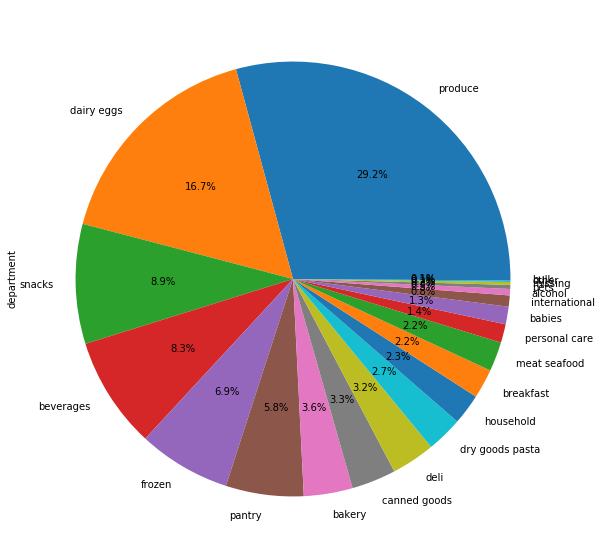

In [50]:
order_products__prior_aisle_dep['department'].value_counts().plot.pie( figsize=(10, 10), autopct='%1.1f%%')
plt.show()